In [ ]:
# Cell 1: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

: 

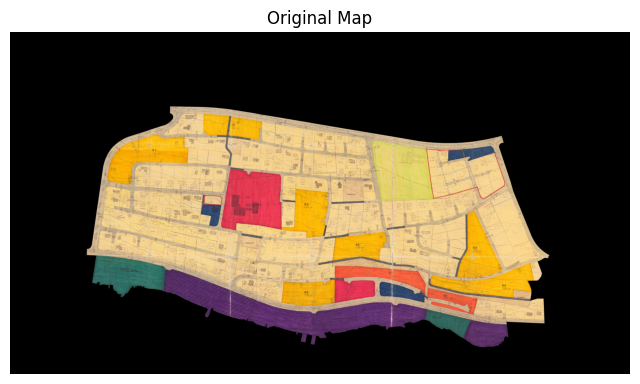

In [ ]:
# Cell 2: Load and preprocess the map image
# Load the map image (ensure your image is in the correct path)
image_path = 'datasets/aalesund/1504200/200.jpg'  # Change this to your map image path
image_bgr = cv2.imread(image_path)  # Load the image in BGR format (OpenCV default)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib display

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Map')
plt.show()

In [ ]:
# Cell 3: Convert the image to the HSV color space
# HSV color space is more suitable for color segmentation
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)


In [ ]:
# Yellow (RGB: 239, 207, 138)
# Approx. HSV: H ~20°, S ~108/255, V ~239/255
lower_yellow = np.array([10, 50, 200])
upper_yellow = np.array([30, 255, 255])

# Red (RGB: 236, 64, 88)
# Approx. HSV wraps around red end: Use two ranges for red:
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Purple (RGB: 84, 48, 91)
# Approx. HSV: H ~145°, S ~120/255, V ~91/255
lower_purple = np.array([135, 80, 40])
upper_purple = np.array([155, 255, 255])

# Orange (RGB: 252, 171, 3)
# Approx. HSV: H ~20°, S ~252/255, V ~252/255
lower_orange = np.array([15, 150, 150])
upper_orange = np.array([25, 255, 255])

# Dark Green (RGB: 52, 110, 100)
# Approx. HSV: H ~85°, S ~134/255, V ~110/255
lower_dark_green = np.array([75, 80, 50])
upper_dark_green = np.array([95, 255, 255])

# Dark Blue (RGB: 41, 70, 111)
# Approx. HSV: H ~108°, S ~160/255, V ~111/255
lower_dark_blue = np.array([100, 100, 50])
upper_dark_blue = np.array([120, 255, 255])

# Light Green (RGB: 217, 211, 93)
# Approx. HSV: H ~28.5°, S ~146/255, V ~217/255
lower_light_green = np.array([20, 80, 150])
upper_light_green = np.array([35, 255, 255])

# Gray (Walkways, RGB: 198, 177, 144)
# Low saturation, near brownish hue ~18° with low S, high V
lower_gray = np.array([15, 20, 100])
upper_gray = np.array([25, 120, 230])

# Blokkbebyggelse (Another Orange, RGB: 248, 100, 64)
# Approx. HSV: H ~6°, S ~189/255, V ~248/255
lower_orange_b = np.array([0, 100, 100])
upper_orange_b = np.array([15, 255, 255])

# Dark Gray (Walkways, RGB: 96, 95, 97)
# Very low saturation, close to pure gray
lower_dark_gray = np.array([0, 0, 50])
upper_dark_gray = np.array([180, 50, 120])


In [ ]:
# Cell 5: Segment the regions based on the defined color ranges
# Create masks for each color range based on the new color definitions
mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
mask_orange = cv2.inRange(image_hsv, lower_orange, upper_orange)
mask_red1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine two red ranges
mask_dark_blue = cv2.inRange(image_hsv, lower_dark_blue, upper_dark_blue)
mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)
mask_dark_green = cv2.inRange(image_hsv, lower_dark_green, upper_dark_green)
mask_light_green = cv2.inRange(image_hsv, lower_light_green, upper_light_green)
mask_gray = cv2.inRange(image_hsv, lower_gray, upper_gray)
mask_orange_b = cv2.inRange(image_hsv, lower_orange_b, upper_orange_b)
mask_dark_gray = cv2.inRange(image_hsv, lower_dark_gray, upper_dark_gray)

# Combine the masks (optional: if you want a single mask of all regions)
combined_mask = cv2.bitwise_or(mask_yellow, mask_orange)
combined_mask = cv2.bitwise_or(combined_mask, mask_red)
combined_mask = cv2.bitwise_or(combined_mask, mask_dark_blue)
combined_mask = cv2.bitwise_or(combined_mask, mask_purple)
combined_mask = cv2.bitwise_or(combined_mask, mask_dark_green)
combined_mask = cv2.bitwise_or(combined_mask, mask_light_green)
combined_mask = cv2.bitwise_or(combined_mask, mask_gray)
combined_mask = cv2.bitwise_or(combined_mask, mask_orange_b)
combined_mask = cv2.bitwise_or(combined_mask, mask_dark_gray)

In [ ]:
# Cell 6: Apply morphological operations to clean up the masks
# Use dilation and erosion to clean the masks (remove noise, fill gaps)
kernel = np.ones((5, 5), np.uint8)  # Define a kernel for morphological operations

# Clean the masks for each region
mask_yellow_cleaned = cv2.morphologyEx(mask_yellow, cv2.MORPH_CLOSE, kernel)
mask_orange_cleaned = cv2.morphologyEx(mask_orange, cv2.MORPH_CLOSE, kernel)
mask_red_cleaned = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_dark_blue_cleaned = cv2.morphologyEx(mask_dark_blue, cv2.MORPH_CLOSE, kernel)
mask_purple_cleaned = cv2.morphologyEx(mask_purple, cv2.MORPH_CLOSE, kernel)
mask_dark_green_cleaned = cv2.morphologyEx(mask_dark_green, cv2.MORPH_CLOSE, kernel)
mask_light_green_cleaned = cv2.morphologyEx(mask_light_green, cv2.MORPH_CLOSE, kernel)
mask_gray_cleaned = cv2.morphologyEx(mask_gray, cv2.MORPH_CLOSE, kernel)
mask_orange_b_cleaned = cv2.morphologyEx(mask_orange_b, cv2.MORPH_CLOSE, kernel)
mask_dark_gray_cleaned = cv2.morphologyEx(mask_dark_gray, cv2.MORPH_CLOSE, kernel)

# Combine cleaned masks if necessary
combined_mask_cleaned = cv2.bitwise_or(mask_yellow_cleaned, mask_orange_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_red_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_dark_blue_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_purple_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_dark_green_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_light_green_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_gray_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_orange_b_cleaned)
combined_mask_cleaned = cv2.bitwise_or(combined_mask_cleaned, mask_dark_gray_cleaned)

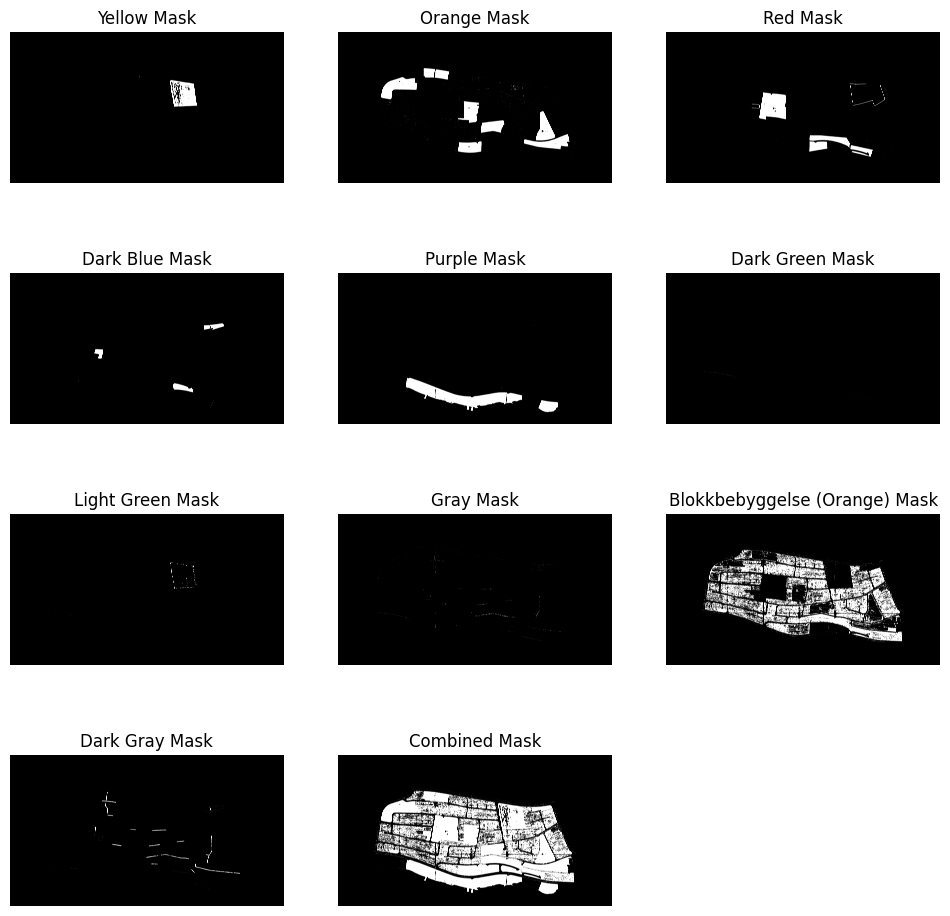

In [ ]:
# Cell 7: Visualize the cleaned masks
plt.figure(figsize=(12, 12))

plt.subplot(4, 3, 1)
plt.imshow(mask_yellow_cleaned, cmap='gray')
plt.title('Yellow Mask')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(mask_orange_cleaned, cmap='gray')
plt.title('Orange Mask')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(mask_red_cleaned, cmap='gray')
plt.title('Red Mask')
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(mask_dark_blue_cleaned, cmap='gray')
plt.title('Dark Blue Mask')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(mask_purple_cleaned, cmap='gray')
plt.title('Purple Mask')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(mask_dark_green_cleaned, cmap='gray')
plt.title('Dark Green Mask')
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(mask_light_green_cleaned, cmap='gray')
plt.title('Light Green Mask')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(mask_gray_cleaned, cmap='gray')
plt.title('Gray Mask')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(mask_orange_b_cleaned, cmap='gray')
plt.title('Blokkbebyggelse (Orange) Mask')
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(mask_dark_gray_cleaned, cmap='gray')
plt.title('Dark Gray Mask')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(combined_mask_cleaned, cmap='gray')
plt.title('Combined Mask')
plt.axis('off')

plt.show()

In [ ]:
# Cell 8: Extract the contours of the segmented regions
# Find contours from the cleaned masks (for each color region)
contours_yellow, _ = cv2.findContours(mask_yellow_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_orange, _ = cv2.findContours(mask_orange_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, _ = cv2.findContours(mask_red_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_dark_blue, _ = cv2.findContours(mask_dark_blue_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_purple, _ = cv2.findContours(mask_purple_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_dark_green, _ = cv2.findContours(mask_dark_green_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_light_green, _ = cv2.findContours(mask_light_green_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_gray, _ = cv2.findContours(mask_gray_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_orange_b, _ = cv2.findContours(mask_orange_b_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_dark_gray, _ = cv2.findContours(mask_dark_gray_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image for visualization
output_image = image_rgb.copy()

cv2.drawContours(output_image, contours_yellow, -1, (255, 255, 0), 2)  # Yellow contours
cv2.drawContours(output_image, contours_orange, -1, (255, 165, 0), 2)  # Orange contours
cv2.drawContours(output_image, contours_red, -1, (255, 0, 0), 2)  # Red contours
cv2.drawContours(output_image, contours_dark_blue, -1, (0, 0, 255), 2)  # Dark Blue contours
cv2.drawContours(output_image, contours_purple, -1, (128, 0, 128), 2)  # Purple contours
cv2.drawContours(output_image, contours_dark_green, -1, (0, 128, 0), 2)  # Dark Green contours
cv2.drawContours(output_image, contours_light_green, -1, (173, 255, 47), 2)  # Light Green contours
cv2.drawContours(output_image, contours_gray, -1, (128, 128, 128), 2)  # Gray contours
cv2.drawContours(output_image, contours_orange_b, -1, (255, 100, 64), 2)  # Blokkbebyggelse Orange contours
cv2.drawContours(output_image, contours_dark_gray, -1, (96, 95, 97), 2)  # Dark Gray contours

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

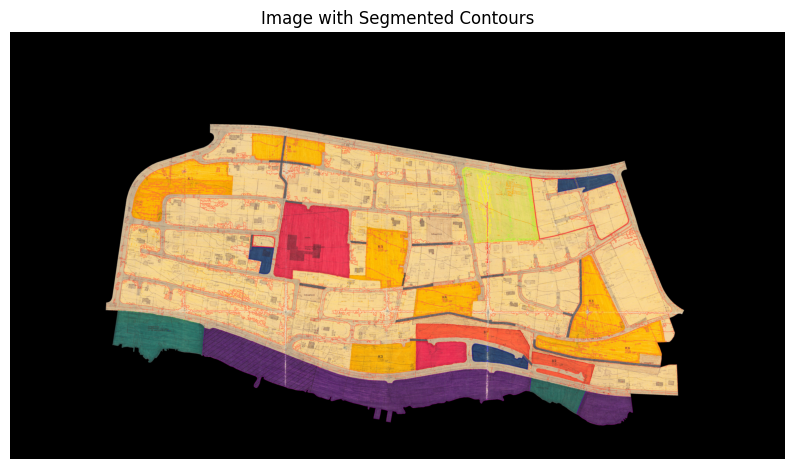

In [ ]:
# Visualize the image with contours
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.title('Image with Segmented Contours')
plt.show()